In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# copying data file path 
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Hemolysis_Plots/20240201_Hemolysis_DIPLibrary_pDNA5ng.xlsx" 
sheet_name = "Sheet2"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [4]:
# saving variables from excel sheet for plotting
polyplex = df['polyplex']
avg = df['hemolysis avg']
stdev = df['stddev']
NP_ratio = df['N/P ratio']

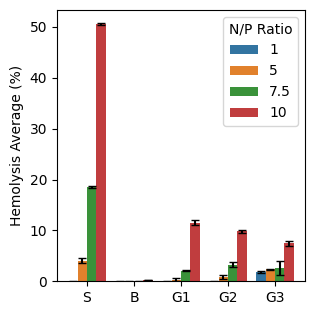

In [5]:
plt.figure(figsize=(3.25, 3.25))

bar_plot = sns.barplot(data=df, x='polyplex', y='hemolysis avg', hue='N/P ratio', dodge=True)

ax = plt.gca()

num_polyplex = len(df['polyplex'].unique())
num_ratios = len(df['N/P ratio'].unique())


for poly_index, polyplex in enumerate(df['polyplex'].unique()):
    # filter df for each 'polyplex' category
    poly_df = df[df['polyplex'] == polyplex]

    # iterate through each 'N/P ratio' within the 'polyplex' category
    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):

        x = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2  # Adjust 0.2 based on bar width

        mean_value = group_df['hemolysis avg'].mean()
        std_dev = group_df['stddev'].mean()

        lower_limit = max(mean_value - std_dev, 0)

        error_length = abs(mean_value - lower_limit)

        plt.errorbar(x=x, y=mean_value, 
                     yerr=error_length, fmt='none', c='black', capsize=3)   

plt.ylabel('Hemolysis Average (%)')
plt.xlabel('')
plt.ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

formatted_labels = [str(int(float(label))) if float(label).is_integer() else str(float(label)) for label in labels]

ax.legend(handles, formatted_labels, title='N/P Ratio', loc='upper right', ncol=1)

plt.tight_layout()
plt.show()

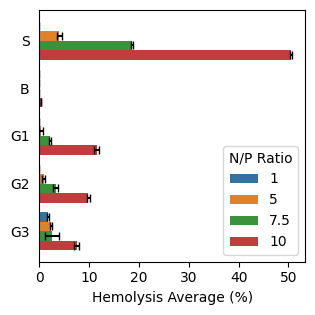

In [7]:
plt.figure(figsize=(3.25, 3.25))

bar_plot = sns.barplot(data=df, y='polyplex', x='hemolysis avg', hue='N/P ratio', dodge=True)

ax = plt.gca()

num_polyplex = len(df['polyplex'].unique())
num_ratios = len(df['N/P ratio'].unique())

for poly_index, polyplex in enumerate(df['polyplex'].unique()):
    poly_df = df[df['polyplex'] == polyplex]
    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        y = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2 # Adjust 0.2 based on bar width
        mean_value = group_df['hemolysis avg'].mean()
        std_dev = group_df['stddev'].mean()
        lower_limit = max(mean_value - std_dev, 0)
        error_length = abs(mean_value - lower_limit)

        plt.errorbar(y=y, x=mean_value,
                     xerr=error_length, fmt='none', c='black', capsize=3)

plt.xlabel('Hemolysis Average (%)')
plt.ylabel('')
plt.xlim(left=0)

handles, labels = ax.get_legend_handles_labels()

formatted_labels = [str(int(float(label))) if float(label).is_integer() else str(float(label)) for label in labels]

ax.legend(handles, formatted_labels, title='N/P Ratio', loc='lower right', ncol=1)
ax.tick_params(left=False)

plt.tight_layout()
plt.show()